<a href="https://colab.research.google.com/github/Nildk123/DeepLearning-1/blob/master/S9/QuizDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-06 17:21:02.065855


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
root_dir = "/content/drive/My Drive/Week9/"
os.chdir(root_dir)

In [27]:
from plot_graph import plot_images, plot_graph
from utility import *

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image

In [5]:
## importing and transforming data
from read_inputs import read_transform_inputs
trainset, trainloader, testset, testloader, classes = read_transform_inputs()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse  frog truck horse


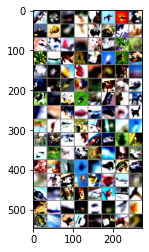

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
!pip install torchsummary
from torchsummary import summary
from Quiz_model import QuizDNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [13]:
from train import train
from test import test
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

epochs = 40
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.1, epochs=epochs,
                       steps_per_epoch=len(trainloader))

def run(l1_decay=0.0, l2_decay=0.0):
  test_losses = []
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(epochs):
      print("EPOCH:", epoch+1)
      train(model, device, trainloader, criterion, optimizer, epoch, l1_decay, l2_decay, scheduler)
      test(model, device, testloader, criterion, classes, test_losses, test_accs,
           misclassified_imgs, correct_imgs, epoch==epochs-1)
  return test_losses, test_accs, misclassified_imgs, correct_imgs

# train and test the model
test_losses, test_accs, misclassified_imgs, correct_imgs = run(l1_decay=3e-6, l2_decay=1e-3)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


L2_loss=116.88886260986328 L1_loss=6974.3916015625 Loss=1.8657293319702148 Batch_id=390 Accuracy=31.24: 100%|██████████| 391/391 [00:26<00:00, 14.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0129, Accuracy: 3979/10000 (39.79%)

EPOCH: 2


L2_loss=119.36546325683594 L1_loss=7157.79443359375 Loss=1.7763012647628784 Batch_id=390 Accuracy=37.55: 100%|██████████| 391/391 [00:26<00:00, 14.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0119, Accuracy: 4476/10000 (44.76%)

EPOCH: 3


L2_loss=123.63871002197266 L1_loss=7556.16796875 Loss=1.7243341207504272 Batch_id=390 Accuracy=41.59: 100%|██████████| 391/391 [00:26<00:00, 14.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0107, Accuracy: 5035/10000 (50.35%)

EPOCH: 4


L2_loss=129.2142791748047 L1_loss=8197.8369140625 Loss=1.5537384748458862 Batch_id=390 Accuracy=44.33: 100%|██████████| 391/391 [00:26<00:00, 14.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0093, Accuracy: 5820/10000 (58.20%)

EPOCH: 5


L2_loss=135.23992919921875 L1_loss=8988.0302734375 Loss=1.6289434432983398 Batch_id=390 Accuracy=47.19: 100%|██████████| 391/391 [00:26<00:00, 14.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0094, Accuracy: 5750/10000 (57.50%)

EPOCH: 6


L2_loss=141.15802001953125 L1_loss=9823.5537109375 Loss=1.5174075365066528 Batch_id=390 Accuracy=49.01: 100%|██████████| 391/391 [00:26<00:00, 14.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0092, Accuracy: 5899/10000 (58.99%)

EPOCH: 7


L2_loss=147.73284912109375 L1_loss=10716.3701171875 Loss=1.4016337394714355 Batch_id=390 Accuracy=51.08: 100%|██████████| 391/391 [00:26<00:00, 14.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0087, Accuracy: 6125/10000 (61.25%)

EPOCH: 8


L2_loss=153.01515197753906 L1_loss=11546.3427734375 Loss=1.5965036153793335 Batch_id=390 Accuracy=52.93: 100%|██████████| 391/391 [00:26<00:00, 14.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 6087/10000 (60.87%)

EPOCH: 9


L2_loss=157.5963134765625 L1_loss=12319.2216796875 Loss=1.4583464860916138 Batch_id=390 Accuracy=54.36: 100%|██████████| 391/391 [00:26<00:00, 14.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 6542/10000 (65.42%)

EPOCH: 10


L2_loss=161.57208251953125 L1_loss=12996.7548828125 Loss=1.4207377433776855 Batch_id=390 Accuracy=55.56: 100%|██████████| 391/391 [00:26<00:00, 14.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 6920/10000 (69.20%)

EPOCH: 11


L2_loss=165.38499450683594 L1_loss=13620.9658203125 Loss=1.2959859371185303 Batch_id=390 Accuracy=56.33: 100%|██████████| 391/391 [00:26<00:00, 14.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0072, Accuracy: 6779/10000 (67.79%)

EPOCH: 12


L2_loss=168.4213104248047 L1_loss=14173.3134765625 Loss=1.3673063516616821 Batch_id=390 Accuracy=57.56: 100%|██████████| 391/391 [00:26<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 6810/10000 (68.10%)

EPOCH: 13


L2_loss=171.17807006835938 L1_loss=14671.359375 Loss=1.511857271194458 Batch_id=390 Accuracy=58.11: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7195/10000 (71.95%)

EPOCH: 14


L2_loss=173.22291564941406 L1_loss=15109.212890625 Loss=1.271599292755127 Batch_id=390 Accuracy=58.96: 100%|██████████| 391/391 [00:26<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7185/10000 (71.85%)

EPOCH: 15


L2_loss=175.38845825195312 L1_loss=15503.869140625 Loss=1.3702000379562378 Batch_id=390 Accuracy=59.45: 100%|██████████| 391/391 [00:26<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 7147/10000 (71.47%)

EPOCH: 16


L2_loss=177.13145446777344 L1_loss=15873.189453125 Loss=1.3688263893127441 Batch_id=390 Accuracy=60.05: 100%|██████████| 391/391 [00:26<00:00, 14.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 7232/10000 (72.32%)

EPOCH: 17


L2_loss=178.8114471435547 L1_loss=16186.5517578125 Loss=1.3338373899459839 Batch_id=390 Accuracy=60.09: 100%|██████████| 391/391 [00:26<00:00, 14.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7398/10000 (73.98%)

EPOCH: 18


L2_loss=180.30908203125 L1_loss=16477.146484375 Loss=1.2327196598052979 Batch_id=390 Accuracy=61.28: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7432/10000 (74.32%)

EPOCH: 19


L2_loss=181.8001708984375 L1_loss=16758.80078125 Loss=1.2732422351837158 Batch_id=390 Accuracy=61.08: 100%|██████████| 391/391 [00:26<00:00, 14.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 7257/10000 (72.57%)

EPOCH: 20


L2_loss=183.34030151367188 L1_loss=16989.599609375 Loss=1.2624874114990234 Batch_id=390 Accuracy=61.68: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7406/10000 (74.06%)

EPOCH: 21


L2_loss=184.70387268066406 L1_loss=17212.814453125 Loss=1.3613927364349365 Batch_id=390 Accuracy=62.29: 100%|██████████| 391/391 [00:26<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7345/10000 (73.45%)

EPOCH: 22


L2_loss=185.87570190429688 L1_loss=17401.048828125 Loss=1.3086576461791992 Batch_id=390 Accuracy=62.14: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0058, Accuracy: 7494/10000 (74.94%)

EPOCH: 23


L2_loss=187.2688751220703 L1_loss=17574.1328125 Loss=1.1583807468414307 Batch_id=390 Accuracy=63.07: 100%|██████████| 391/391 [00:26<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 7622/10000 (76.22%)

EPOCH: 24


L2_loss=187.9320831298828 L1_loss=17712.798828125 Loss=1.2258201837539673 Batch_id=390 Accuracy=63.23: 100%|██████████| 391/391 [00:26<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0055, Accuracy: 7589/10000 (75.89%)

EPOCH: 25


L2_loss=188.82711791992188 L1_loss=17826.642578125 Loss=1.344014048576355 Batch_id=390 Accuracy=63.62: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7782/10000 (77.82%)

EPOCH: 26


L2_loss=189.49301147460938 L1_loss=17921.798828125 Loss=1.0782872438430786 Batch_id=390 Accuracy=64.05: 100%|██████████| 391/391 [00:26<00:00, 14.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0051, Accuracy: 7724/10000 (77.24%)

EPOCH: 27


L2_loss=189.67318725585938 L1_loss=17976.962890625 Loss=1.2791814804077148 Batch_id=390 Accuracy=64.17: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7717/10000 (77.17%)

EPOCH: 28


L2_loss=189.97897338867188 L1_loss=18032.08203125 Loss=1.2944228649139404 Batch_id=390 Accuracy=64.96: 100%|██████████| 391/391 [00:26<00:00, 14.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0052, Accuracy: 7700/10000 (77.00%)

EPOCH: 29


L2_loss=190.0747528076172 L1_loss=18065.626953125 Loss=1.1857504844665527 Batch_id=390 Accuracy=65.55: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7832/10000 (78.32%)

EPOCH: 30


L2_loss=190.17266845703125 L1_loss=18065.1875 Loss=1.2338742017745972 Batch_id=390 Accuracy=66.10: 100%|██████████| 391/391 [00:26<00:00, 14.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7914/10000 (79.14%)

EPOCH: 31


L2_loss=189.80044555664062 L1_loss=18051.916015625 Loss=1.0864200592041016 Batch_id=390 Accuracy=66.39: 100%|██████████| 391/391 [00:26<00:00, 14.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7898/10000 (78.98%)

EPOCH: 32


L2_loss=189.67471313476562 L1_loss=18016.08203125 Loss=1.3469375371932983 Batch_id=390 Accuracy=66.83: 100%|██████████| 391/391 [00:26<00:00, 14.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0048, Accuracy: 7850/10000 (78.50%)

EPOCH: 33


L2_loss=189.00277709960938 L1_loss=17971.255859375 Loss=1.4692379236221313 Batch_id=390 Accuracy=67.33: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 7979/10000 (79.79%)

EPOCH: 34


L2_loss=188.3312225341797 L1_loss=17915.203125 Loss=1.1837822198867798 Batch_id=390 Accuracy=67.94: 100%|██████████| 391/391 [00:26<00:00, 14.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0046, Accuracy: 8009/10000 (80.09%)

EPOCH: 35


L2_loss=187.72723388671875 L1_loss=17854.619140625 Loss=1.0509151220321655 Batch_id=390 Accuracy=68.72: 100%|██████████| 391/391 [00:26<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0045, Accuracy: 8032/10000 (80.32%)

EPOCH: 36


L2_loss=187.17747497558594 L1_loss=17803.96875 Loss=0.9695231914520264 Batch_id=390 Accuracy=68.97: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8049/10000 (80.49%)

EPOCH: 37


L2_loss=186.76034545898438 L1_loss=17762.3203125 Loss=1.0861543416976929 Batch_id=390 Accuracy=69.45: 100%|██████████| 391/391 [00:26<00:00, 14.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8101/10000 (81.01%)

EPOCH: 38


L2_loss=186.42904663085938 L1_loss=17736.359375 Loss=0.8503338098526001 Batch_id=390 Accuracy=70.42: 100%|██████████| 391/391 [00:26<00:00, 14.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8105/10000 (81.05%)

EPOCH: 39


L2_loss=186.29359436035156 L1_loss=17725.515625 Loss=1.016549825668335 Batch_id=390 Accuracy=70.65: 100%|██████████| 391/391 [00:26<00:00, 14.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8112/10000 (81.12%)

EPOCH: 40


L2_loss=186.27503967285156 L1_loss=17723.86328125 Loss=1.3627755641937256 Batch_id=390 Accuracy=70.69: 100%|██████████| 391/391 [00:26<00:00, 14.54it/s]
/content/drive/My Drive/Week9/test.py:23: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]


Test set: Average loss: 0.0043, Accuracy: 8118/10000 (81.18%)



In [14]:
PATH = 'model_quiz.sav'
torch.save(model.state_dict(), PATH)

In [35]:
from accuracy_check import check_accuracy     
check_accuracy(testloader,device,model)

Accuracy of the network on the 10000 test images: 81 %


81.18

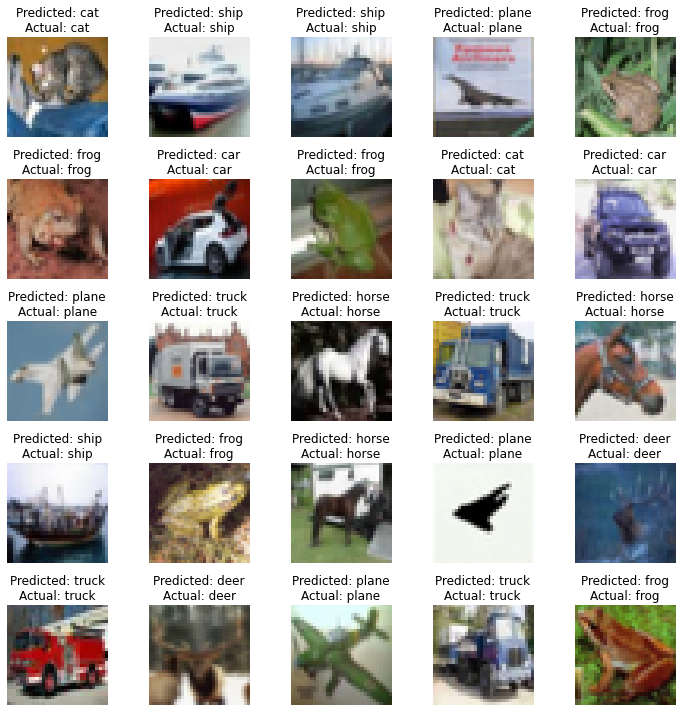

In [33]:
plot_images(correct_imgs, classes, "correct_imgs.png")

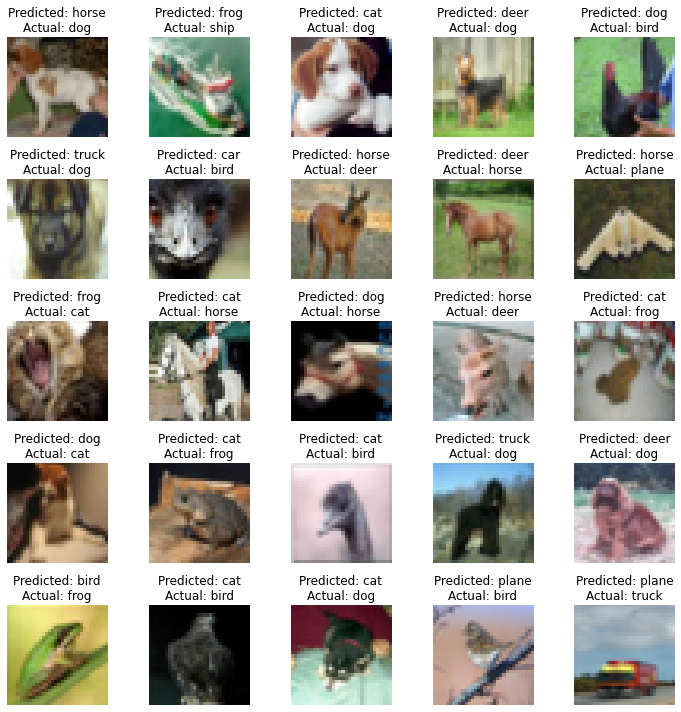

In [34]:
plot_images(misclassified_imgs, classes, "misclassified_imgs.png")

In [36]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-06 17:59:38.408693
